
🧪 Running experiment: Low Trust

================= 🕒 Step 0 =================
👑 Leader 0 promotes with influence=0.75
🧍‍♀️ Consumer 46 | Leader 0 | Trust=0.54 | Sens=0.60 | Infl=0.75 | Prob=0.37 | Buy=True
🧍‍♀️ Consumer 7 | Leader 0 | Trust=0.49 | Sens=0.68 | Infl=0.75 | Prob=0.32 | Buy=True
🧍‍♀️ Consumer 43 | Leader 0 | Trust=0.60 | Sens=0.66 | Infl=0.75 | Prob=0.39 | Buy=False
🧍‍♀️ Consumer 34 | Leader 0 | Trust=0.39 | Sens=0.49 | Infl=0.75 | Prob=0.30 | Buy=False
🧍‍♀️ Consumer 17 | Leader 0 | Trust=0.41 | Sens=0.69 | Infl=0.75 | Prob=0.26 | Buy=False
🧍‍♀️ Consumer 41 | Leader 0 | Trust=0.48 | Sens=0.93 | Infl=0.75 | Prob=0.25 | Buy=False
🧍‍♀️ Consumer 21 | Leader 0 | Trust=0.37 | Sens=0.50 | Infl=0.75 | Prob=0.28 | Buy=False
🧍‍♀️ Consumer 48 | Leader 0 | Trust=0.60 | Sens=0.67 | Infl=0.75 | Prob=0.39 | Buy=True
🧍‍♀️ Consumer 18 | Leader 0 | Trust=0.55 | Sens=0.73 | Infl=0.75 | Prob=0.34 | Buy=True
🧍‍♀️ Consumer 27 | Leader 0 | Trust=0.49 | Sens=0.73 | Infl=0.75 | Prob=0.30 | Buy=Fa

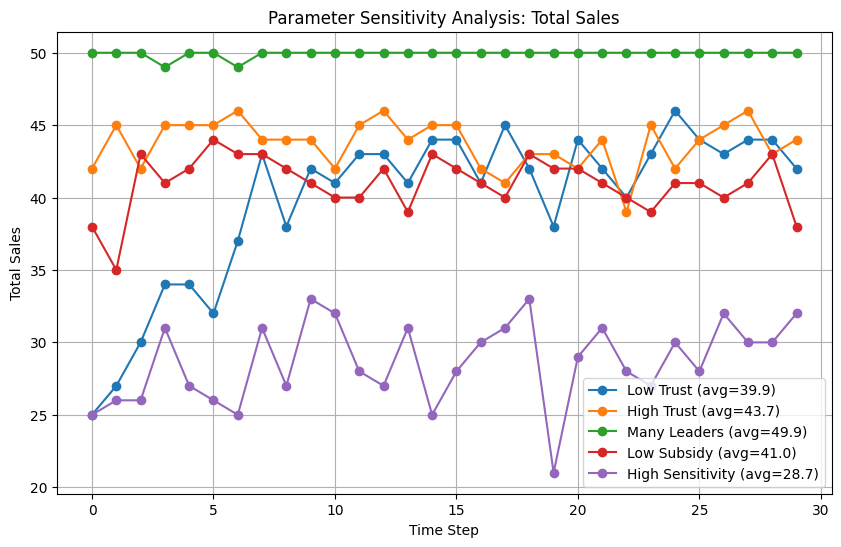

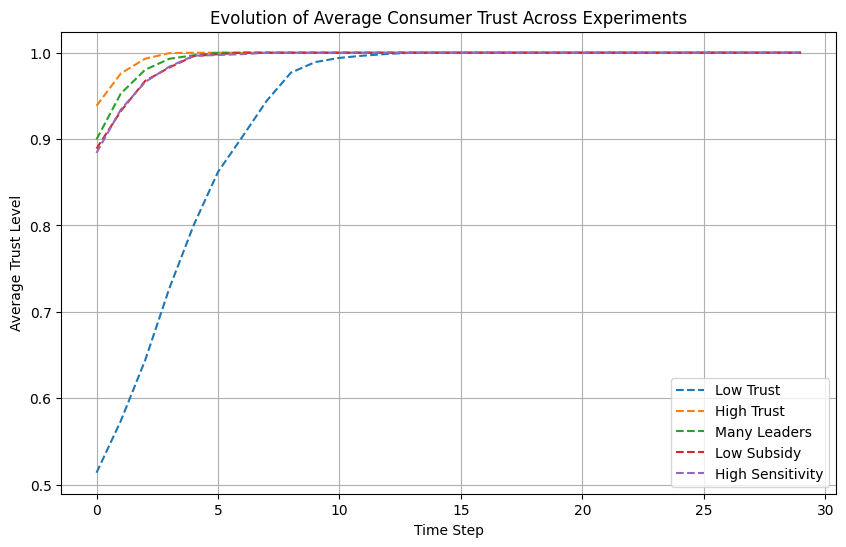

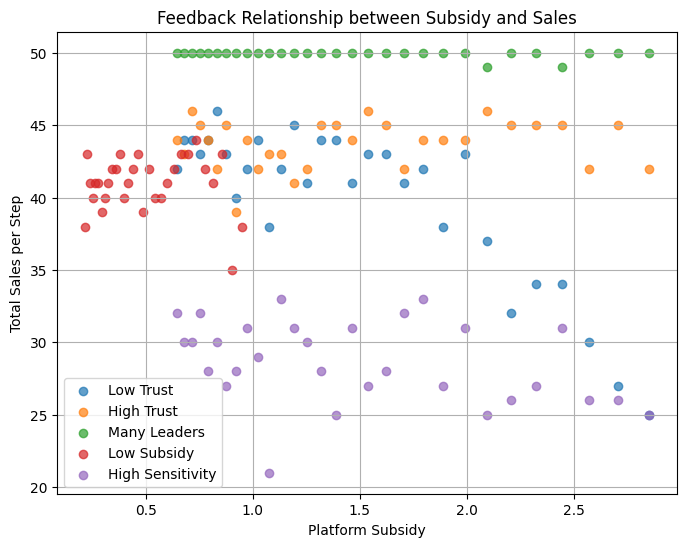

📁 Extended results saved to: /Users/estherwang/Documents/GitHub/4403_project/data/extended_sensitivity_results.csv


,Experiment,Average Sales,Final Trust,Final Subsidy
0,Low Trust,39.866667,1.0,0.643916
1,High Trust,43.733333,1.0,0.643916
2,Many Leaders,49.933333,1.0,0.643916
3,Low Subsidy,41.000000,1.0,0.214639
4,High Sensitivity,28.666667,1.0,0.643916


In [1]:
# =============================================
# 📘 Parameter Sensitivity Analysis (Final Version)
# =============================================

import sys, os, random, numpy as np, pandas as pd, matplotlib.pyplot as plt

# --- 导入模型模块 ---
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))
from model import GroupBuyingModel

# 固定随机种子以便复现
random.seed(42)
np.random.seed(42)

# ============================================================
# 🧠 参数敏感性实验设置
# ============================================================

experiments = [
    {"name": "Low Trust", "trust_range": (0.3, 0.6), "price_range": (0.3, 1.0), "leaders": 3, "subsidy": 3},
    {"name": "High Trust", "trust_range": (0.7, 1.0), "price_range": (0.3, 1.0), "leaders": 3, "subsidy": 3},
    {"name": "Many Leaders", "trust_range": (0.6, 1.0), "price_range": (0.3, 1.0), "leaders": 8, "subsidy": 3},
    {"name": "Low Subsidy", "trust_range": (0.6, 1.0), "price_range": (0.3, 1.0), "leaders": 3, "subsidy": 1},
    {"name": "High Sensitivity", "trust_range": (0.6, 1.0), "price_range": (1.0, 2.0), "leaders": 3, "subsidy": 3}
]

results = []

# ============================================================
# 🚀 运行实验
# ============================================================

for exp in experiments:
    print(f"\n==========================")
    print(f"🧪 Running experiment: {exp['name']}")
    print(f"==========================")

    # --- 定义自定义模型（带信任度与补贴追踪） ---
    class CustomModel(GroupBuyingModel):
        def __init__(self):
            from agents import Consumer, Leader, Platform
            from scheduler import SocialScheduler

            n_consumers = 50
            n_leaders = exp["leaders"]
            self.consumers = [
                Consumer(i, random.uniform(*exp["trust_range"]), random.uniform(*exp["price_range"]), list(range(n_consumers)))
                for i in range(n_consumers)
            ]
            self.leaders = [
                Leader(i, random.uniform(0.5, 1.0), random.sample(range(n_consumers), min(30, n_consumers)))
                for i in range(n_leaders)
            ]
            self.platform = Platform(base_price=5, subsidy=exp["subsidy"])
            self.scheduler = SocialScheduler(self.consumers, self.leaders, self.platform)
            self.sales_record, self.avg_trust_record, self.subsidy_record = [], [], []

        def step(self):
            total_sales = self.scheduler.step()
            self.sales_record.append(total_sales)
            avg_trust = np.mean([c.trust for c in self.consumers])
            self.avg_trust_record.append(avg_trust)
            self.subsidy_record.append(self.platform.subsidy)

    # --- 初始化并运行 ---
    model = CustomModel()
    for _ in range(30):  # 模拟30个周期
        model.step()
    
    # --- 保存实验结果 ---
    results.append({
        "Experiment": exp["name"],
        "Sales": model.sales_record,
        "AvgTrust": model.avg_trust_record,
        "Subsidy": model.subsidy_record,
        "AverageSales": np.mean(model.sales_record)
    })

# ============================================================
# 📈 1. 多实验销量曲线
# ============================================================

plt.figure(figsize=(10, 6))
for r in results:
    plt.plot(r["Sales"], marker='o', label=f"{r['Experiment']} (avg={r['AverageSales']:.1f})")
plt.xlabel("Time Step")
plt.ylabel("Total Sales")
plt.title("Parameter Sensitivity Analysis: Total Sales")
plt.legend()
plt.grid(True)
plt.show()

# ============================================================
# 📉 2. 平均信任度变化曲线
# ============================================================

plt.figure(figsize=(10, 6))
for r in results:
    plt.plot(r["AvgTrust"], linestyle='--', label=f"{r['Experiment']}")
plt.xlabel("Time Step")
plt.ylabel("Average Trust Level")
plt.title("Evolution of Average Consumer Trust Across Experiments")
plt.legend()
plt.grid(True)
plt.show()

# ============================================================
# 📊 3. 补贴 vs 销量反馈散点图
# ============================================================

plt.figure(figsize=(8, 6))
for r in results:
    plt.scatter(r["Subsidy"], r["Sales"], alpha=0.7, label=r["Experiment"])
plt.xlabel("Platform Subsidy")
plt.ylabel("Total Sales per Step")
plt.title("Feedback Relationship between Subsidy and Sales")
plt.legend()
plt.grid(True)
plt.show()

# ============================================================
# 💾 保存结果数据
# ============================================================

df_summary = pd.DataFrame({
    "Experiment": [r["Experiment"] for r in results],
    "Average Sales": [r["AverageSales"] for r in results],
    "Final Trust": [r["AvgTrust"][-1] for r in results],
    "Final Subsidy": [r["Subsidy"][-1] for r in results]
})

save_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'data', 'extended_sensitivity_results.csv'))
os.makedirs(os.path.dirname(save_path), exist_ok=True)
df_summary.to_csv(save_path, index=False)

print(f"📁 Extended results saved to: {save_path}")
df_summary